In [1]:
import pandas as pd
import numpy as np

# **Выполнил студент ПИЭ-13МО Иванов Тимофей**

## *Блок Pandas*
### Номер 1

In [37]:
# Функция принимает на вход массив 
def function_1(X):
    zero_indexes = np.where(X[:-1] == 0)[0]
    if zero_indexes.size == 0:
        return
    # Ищем макс. зн. среди элементов перед найденными нулями
    vals_after_zero = X[zero_indexes + 1]
    if vals_after_zero.size == 0:
        return

    return np.max(vals_after_zero)


X = np.random.randint(0, 101, size=100)
print(X[:10])
print(function_1(X))

[62 17 89 43 33 73 61 99 13 94]
7


### Номер 2

In [101]:
# Функция принимает на вход матрицу и число
def function_2(X, val):
    difference = np.abs(X - val)
    if difference.size == 0: 
        return
    # Ищем индекс ближайшего к числу элемента
    min_val_index = np.argmin(difference)
    return X.flat[min_val_index]

# np.random.seed(42)  
X = np.random.randint(0, 101, size=(5, 5))
print(function_2(X, 50))

50


### Номер 3

In [103]:
def fun(x):
    return np.sum(x, axis=1) + np.sum(x @ x.T, axis=1)

data = np.random.normal(0, 5, size=(10, 20, 5))


# Вычисляем сумму элементов по оси k (10, 20)
sum_along_k = np.sum(data, axis=2)

# Вычисляем сумму квадратов элементов каждого вектора
norm_squared = np.sum(data**2, axis=2)

result = sum_along_k + norm_squared

print("Форма исходных данных:", data.shape)
print("Форма результата:", result.shape)
result_primenenie = np.stack([fun(block) for block in data], axis=0)
print(f'\nВычисление функции на данных data: {result_primenenie.shape}')

Форма исходных данных: (10, 20, 5)
Форма результата: (10, 20)

Вычисление функции на данных data: (10, 20)


### Номер 4

In [123]:
def pairwise_distances(X):
    # Вычисляем квадрат координат точек
    squared_norms = np.sum(X**2, axis=1)
    
    # Вычисляем попарные скалярные произведения
    dot_products = X @ X.T
    
    # (x-y)^2 = x^2 - 2*(x,y) + (y)^2 и убираем отриц. зн.
    squared_distances = squared_norms[:, np.newaxis] - 2 * dot_products + squared_norms[np.newaxis, :]
    squared_distances = np.maximum(squared_distances, 0)
    
    return np.sqrt(squared_distances)

points = np.random.rand(5, 5)
print("Точки:")
print(points)

distances = pairwise_distances(points)
print("Матрица попарных расстояний:")
print(distances)

Точки:
[[0.20343648 0.12738642 0.28550878 0.5315774  0.5105618 ]
 [0.82059876 0.40456866 0.48434443 0.01336768 0.40973924]
 [0.64777423 0.01550833 0.28088197 0.20795636 0.04198543]
 [0.47926009 0.18172329 0.74308154 0.84792788 0.54558518]
 [0.98170734 0.45047857 0.51336821 0.98921775 0.23154844]]
Матрица попарных расстояний:
[[0.         0.88088671 0.73093676 0.62426618 1.02435207]
 [0.88088671 0.         0.62907936 0.97368469 1.0064499 ]
 [0.73093676 0.62907936 0.         0.9658308  1.00053175]
 [0.62426618 0.97368469 0.9658308  0.         0.70429593]
 [1.02435207 1.0064499  1.00053175 0.70429593 0.        ]]


## *Блок Pandas*
### Номер 1 и 2

In [138]:
import pandas as pd

# Выбор движка и сепарации нужгна для избежания проблем при парсинге
df = pd.read_csv('titanic.csv', sep=None, engine="python", encoding="utf-8")

# Номер 1
print("1) Описание набора данных \"titanic.csv\":")
print(f"Распределение мужчин и женщин: \n{df['Sex'].value_counts()}")

# Сортируем по возрастанию класса
print(f"\nКоличество пассажиров по классам: \n{df['Pclass'].value_counts().sort_index()}")
print("\nСтатистика по возрасту:")
print(f"Средний возраст: {df['Age'].mean():.1f}")
print(f"Минимальный возраст: {df['Age'].min():.1f}")
print(f"Максимальный возраст: {df['Age'].max():.1f}")
print(f"\nКоличество выживших пассажиров: {df['Survived'].sum()}")

print(f"\n-------------")

# Номер 2
print("\n2) Средний возраст пассажиров по классам:")
age_by_class = df.groupby('Pclass')['Age'].mean()
print(age_by_class)

# Считаем стандартное отклонение средних возрастов пассаржиров по классам
std_dev = age_by_class.std()
print(f"\nСтандартное отклонение средних возрастов пассажиров: {std_dev:.2f}")
if std_dev < 4:
    print("Следовательно, средний возраст примерно одинаков во всех классах")
else:
    print("Следовательно, средний возраст значительно отличается между классами")

1) Описание набора данных "titanic.csv":
Распределение мужчин и женщин: 
Sex
male      100
female     56
Name: count, dtype: int64

Количество пассажиров по классам: 
Pclass
1    30
2    30
3    96
Name: count, dtype: int64

Статистика по возрасту:
Средний возраст: 28.1
Минимальный возраст: 0.8
Максимальный возраст: 71.0

Количество выживших пассажиров: 54

-------------

2) Средний возраст пассажиров по классам:
Pclass
1    38.111111
2    28.114828
3    24.307143
Name: Age, dtype: float64

Стандартное отклонение средних возрастов пассажиров: 7.13
Следовательно, средний возраст значительно отличается между классами


## *Блок Matplotlib*
### Номер 1

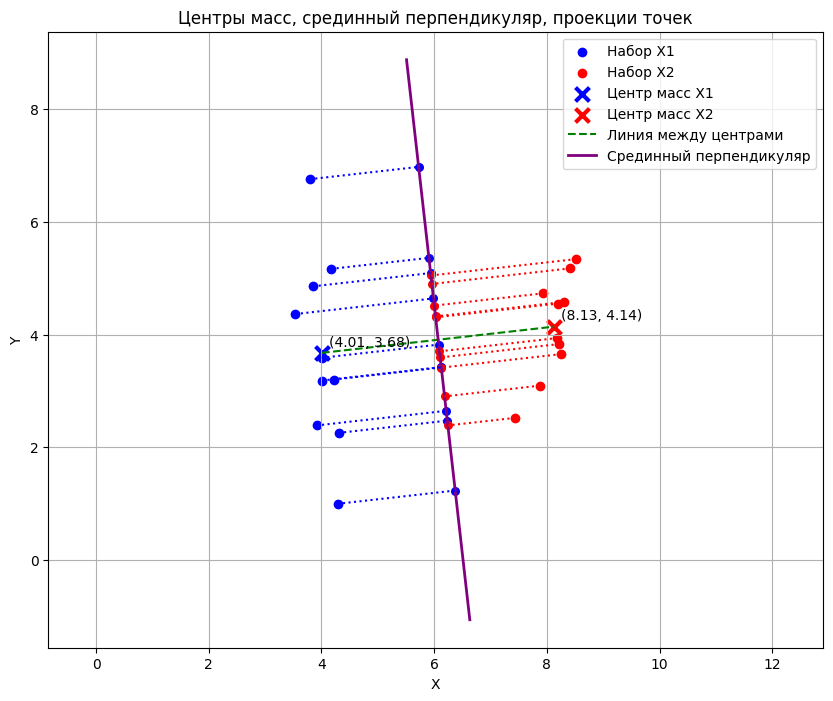

In [157]:
import matplotlib.pyplot as plt

# Генерируем кластеры
np.random.seed(42)  
X1 = np.random.multivariate_normal([4,4],[[0.1,-0.4],[-0.4,3]], size = 10)
X2 = np.random.multivariate_normal([8,4],[[0.2,0.4],[0.4,1]], size = 10)

# Центры масс
center1 = np.mean(X1, axis=0)
center2 = np.mean(X2, axis=0)

# Прямая между центрами масс
line_x = [center1[0], center2[0]]
line_y = [center1[1], center2[1]]

# Центр срединного перпендикуляра
midpoint = (center1 + center2) / 2 

# Направляющий вектор прямой между центрами
direction_vector = center2 - center1

# Перпендикулярный вектор
perpendicular_vector = np.array([-direction_vector[1], direction_vector[0]])

# Нормализуем перпендикулярный вектор
perpendicular_vector = perpendicular_vector / np.linalg.norm(perpendicular_vector)

# Строим перпендикуляр длиной 5 единиц в обе стороны от середины
perp_length = 5
perp_x = [midpoint[0] - perpendicular_vector[0] * perp_length, 
          midpoint[0] + perpendicular_vector[0] * perp_length]
perp_y = [midpoint[1] - perpendicular_vector[1] * perp_length, 
          midpoint[1] + perpendicular_vector[1] * perp_length]

# Строим проекцию точки перпендикуляром на прямую
def project_point_on_line(point, line_point, line_direction):
    # Нормализуем направляющий вектор
    line_direction = line_direction / np.linalg.norm(line_direction)
    # Вектор от точки на прямой до нашей точки
    v = point - line_point
    # Проекция
    projection = line_point + np.dot(v, line_direction) * line_direction
    return projection

# Строим проекцию на все точки
projections1 = [project_point_on_line(point, midpoint, perpendicular_vector) for point in X1]
projections2 = [project_point_on_line(point, midpoint, perpendicular_vector) for point in X2]

plt.figure(figsize=(10, 8))

plt.scatter(X1[:, 0], X1[:, 1], c='blue', label='Набор X1')
plt.scatter(X2[:, 0], X2[:, 1], c='red', label='Набор X2')

# Рисуем центры масс
plt.scatter(center1[0], center1[1], c='blue', marker='x', s=100, linewidth=3, label='Центр масс X1')
plt.scatter(center2[0], center2[1], c='red', marker='x', s=100, linewidth=3, label='Центр масс X2')

plt.annotate(f'({center1[0]:.2f}, {center1[1]:.2f})', 
             (center1[0], center1[1]), xytext=(5, 5), textcoords='offset points')
plt.annotate(f'({center2[0]:.2f}, {center2[1]:.2f})', 
             (center2[0], center2[1]), xytext=(5, 5), textcoords='offset points')

plt.plot(line_x, line_y, 'g--', label='Линия между центрами')

plt.plot(perp_x, perp_y, 'purple', linewidth=2, label='Срединный перпендикуляр')

# Проекции точек
for point, proj in zip(X1, projections1):
    plt.plot([point[0], proj[0]], [point[1], proj[1]], 'blue', linestyle=':')
    plt.scatter(proj[0], proj[1], c='blue', marker='o', s=30)

for point, proj in zip(X2, projections2):
    plt.plot([point[0], proj[0]], [point[1], proj[1]], 'red', linestyle=':')
    plt.scatter(proj[0], proj[1], c='red', marker='o', s=30)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Центры масс, срединный перпендикуляр, проекции точек')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

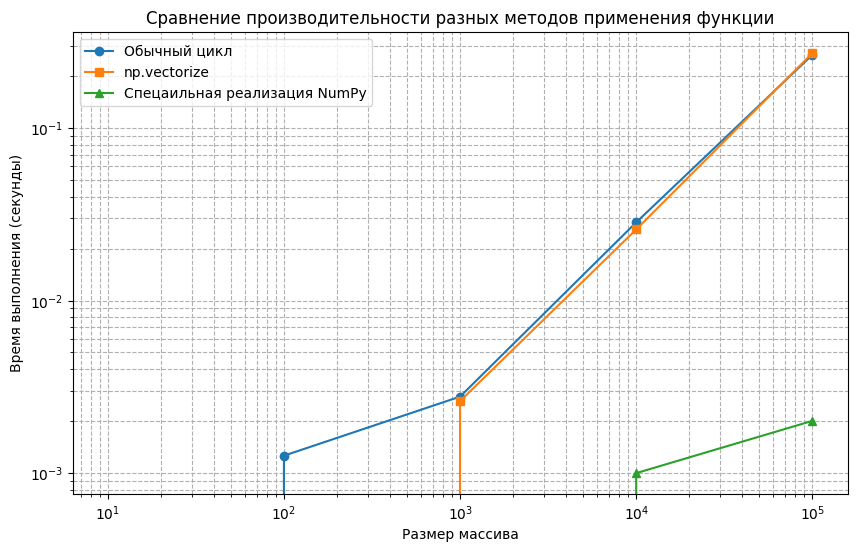

In [154]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Функция для теста
def test_function(x):
    return x**2 + np.sin(x) + np.log(np.abs(x) + 1)

# Цикл Python
def apply_with_loop(arr, func):
    # Создаём массив того же размера, что и входной
    result = np.empty_like(arr)
    for i in range(len(arr)):
        result[i] = func(arr[i])
    return result

# np.vectorize
vectorized_func = np.vectorize(test_function)

# Специальная реализация векторизованной формы при помощи NumPy
def vectorized_numpy(arr):
    return arr**2 + np.sin(arr) + np.log(np.abs(arr) + 1)

# Измерение времени выполнения
sizes = [10, 100, 1000, 10000, 100000]  # Размеры массивов
times_loop = [] # Время выполнения для цикла и так далее
times_vectorize = []
times_numpy = []

for size in sizes:
    arr = np.random.rand(size)
    
    # Измеряем время для цикла
    start = time.time()
    result_loop = apply_with_loop(arr, test_function)
    times_loop.append(time.time() - start)
    
    # Измеряем время для vectorize
    start = time.time()
    result_vectorize = vectorized_func(arr)
    times_vectorize.append(time.time() - start)
    
    # Время для специальной реализации
    start = time.time()
    result_numpy = vectorized_numpy(arr)
    times_numpy.append(time.time() - start)

    # Проверяем одинаковость результатов методов
    assert np.allclose(result_loop, result_vectorize), "Результаты цикла и np.vectorize не совпадают"
    assert np.allclose(result_loop, result_numpy), "Результаты цикла и специальной реализации не совпадают"

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_loop, 'o-', label='Обычный цикл')
plt.plot(sizes, times_vectorize, 's-', label='np.vectorize')
plt.plot(sizes, times_numpy, '^-', label='Спецаильная реализация NumPy')

# Настройки графика
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Размер массива')
plt.ylabel('Время выполнения (секунды)')
plt.title('Сравнение производительности разных методов применения функции')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()